<center>
    <h1 style="font-size:xxx-larger; font-weight:bold;">PROJECT ID - PTID-CDS-JAN-24-1772</h1>
</center>

<center>
    <h1 style="font-size:larger; font-weight:bold;">TEAM ID - 19-AUG-23-CDS-BUN-021-WEM9-CHE</h1>
</center>

### BUSINESS CASE
--------------------------------------------------------------
Bob has started his own mobile company. He wants to give a tough fight to big companies like Apple, Samsung etc.
He does not know how to estimate the price of mobiles his company creates. In this competitive mobile phone market, you cannot simply assume things. To solve this problem he collects sales data of mobile phones of various companies.
Bob wants to find out some relation between features of a mobile phone(eg:- RAM, Internal Memory etc) and its selling price. But he is not so good at Machine Learning. So he needs your help to solve this problem.
In this problem you do not have to predict the actual price but a price range indicating how high the price is.

----------------------------------------------------------------------------------

### Problem Statement

- Task 1:-Prepare a complete data analysis report on the given data.

- Task 2:-On the basis of the mobile Specification like Battery power, 3G enabled , wifi ,Bluetooth, Ram etc predict the Price range of the mobile.

- Task 3:- Prepare the analysis report stating how model will help expanding the business by stating several factors including    feature importance.
--------------------------------------------------------------

In [2]:
from IPython.display import Image
Image(url='https://cdn-images-1.medium.com/max/1000/0*cOpmFtWqpaRp524T.jpg')

#### IMPORTING BASIC LIBRARIES

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\shrut\anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [4]:
import warnings
warnings.filterwarnings('ignore')

#### LOADING DATASET

In [5]:
data = pd.read_csv('datasets_11167_15520_train.csv')
data

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0


#### BASIC CHECKS ON THE GIVEN DATASET

In [6]:
data.shape

(2000, 21)

In [7]:
data.head(pd.set_option('display.max_columns',None))

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,14,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,3,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,3,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,5,336,670,869,18,10,19,1,1,1,0


In [8]:
data.tail()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
1995,794,1,0.5,1,0,1,2,0.8,106,6,14,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,3,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,3,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,5,336,670,869,18,10,19,1,1,1,0
1999,510,1,2.0,1,5,1,45,0.9,168,6,16,483,754,3919,19,4,2,1,1,1,3


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [10]:
data.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,9.916500,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,6.064315,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,0.000000,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,5.000000,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,10.000000,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,15.000000,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,20.000000,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


In [11]:
data.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

### EXPLORATORY DATA ANALYSIS

In [90]:
# for univariate analysis
import sweetviz as sv

report = sv.analyze(data)
report.show_html()

                                             |                                             | [  0%]   00:00 ->…

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


**Distribution of Price Range**

<AxesSubplot:xlabel='price_range', ylabel='count'>

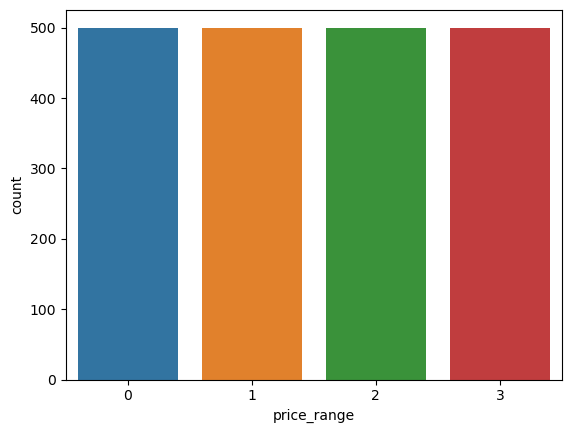

In [12]:
sns.countplot(data=data,x='price_range')

*This countplot illustrates a relatively uniform distribution of mobile phones across the various price ranges in the dataset. This uniformity suggests a balanced representation of mobile phone offerings across different price segments, indicating a diverse market landscape with options available for consumers across various budget levels*

**Battery Power**

<AxesSubplot:xlabel='battery_power', ylabel='Count'>

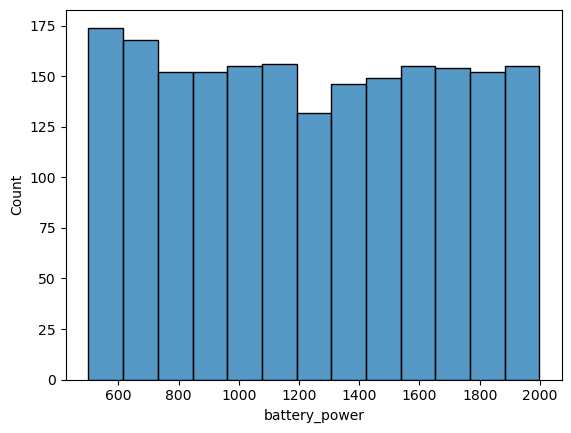

In [14]:
sns.histplot(data=data,x='battery_power')

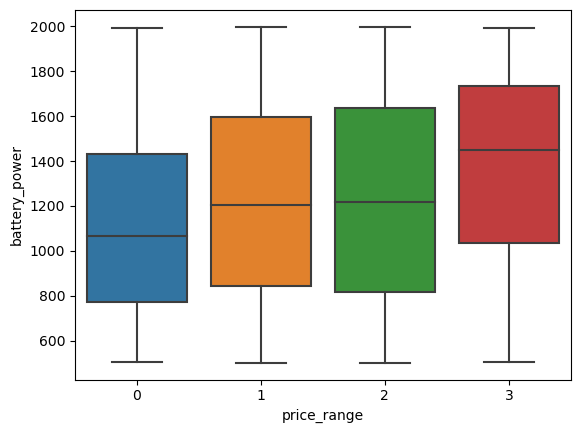

In [42]:
sns.boxplot(data=data,x='price_range',y='battery_power')
plt.show()

**Insights**  
*It is evident that the price range of a mobile increases as the battery power increases. This is because higher-powered batteries require more advanced technology and components, which cost more. Additionally, higher-powered batteries also consume more energy, which requires more cells, which further increases the cost. To emphasize this point, it is worth noting the fact that higher-powered batteries can be more expensive to manufacture, as they require more resources and labor.*

**Bluetooth**

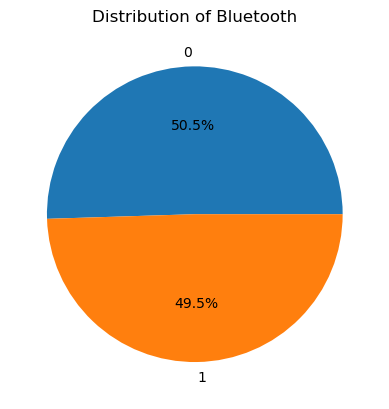

In [16]:
blue_counts = data['blue'].value_counts()
plt.pie(blue_counts, labels=blue_counts.index, autopct='%1.1f%%')
plt.title('Distribution of Bluetooth')
plt.show()

**Insights**  
*Approximately 50% of the devices in the sample are Bluetooth-enabled, whereas the remaining 50% are not. With this knowledge, Bob may, for instance, decide to invest more in the creation of Bluetooth-related features in marketing since consumers value having Bluetooth on their devices. That being said, if Bob misunderstands this information, then this observation might also backfire. For example, given that half of the devices in the dataset lack Bluetooth, a company may conclude that it is not necessary to include Bluetooth in its products.  
This conclusion, however, misses the reality that many consumers still appreciate Bluetooth functionality in their gadgets, and a manufacturer who does not incorporate Bluetooth may lose out on prospects for increased sales and market share. As a result, it's critical to carefully consider how to interpret this data and apply it in a way that complements consumer preferences and industry trends.*

<AxesSubplot:xlabel='blue', ylabel='price_range'>

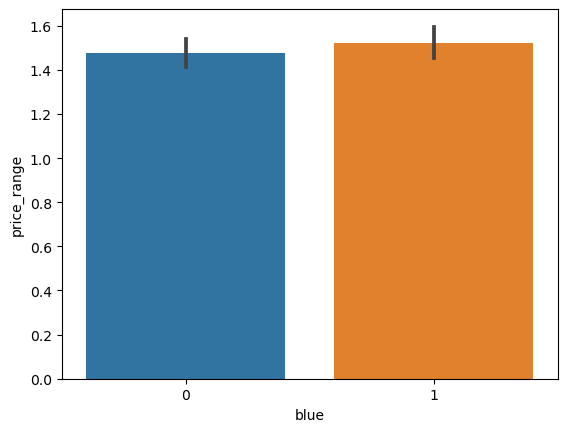

In [17]:
sns.barplot(data=data,x='blue',y='price_range')

**Clock-speed**

<AxesSubplot:xlabel='clock_speed', ylabel='count'>

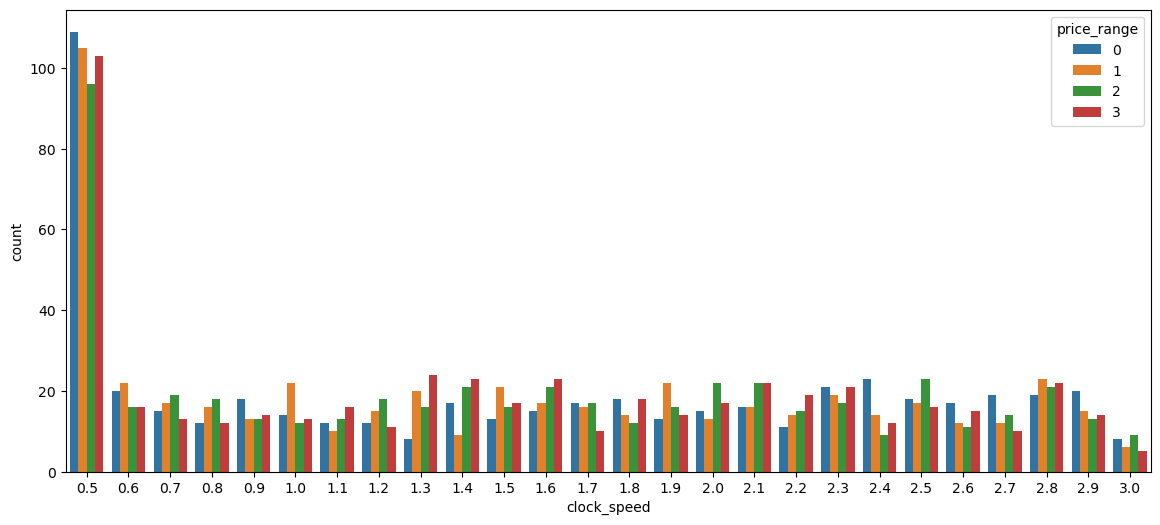

In [54]:
plt.figure(figsize=(14,6))
sns.countplot(data=data,x='clock_speed',hue='price_range')

**Insights**  
*Surprisingly, mobile phones featuring a clock speed of 0.5 GHz exhibits the highest count of mobile phones compared to those with a clock speed of 3.0 GHz in our dataset. This unexpected finding may suggest that factors beyond clock speed, such as processor architecture, brand reputation, or additional features, play a significant role in determining the perceived value and pricing of mobile phones. It's possible that phones with a lower clock speed offer superior optimization, power efficiency, or brand prestige, which contribute to their higher price positioning.  
Further analysis is warranted to uncover the underlying factors driving this counterintuitive relationship and its implications for market positioning and product differentiation strategies.*

<AxesSubplot:xlabel='clock_speed', ylabel='price_range'>

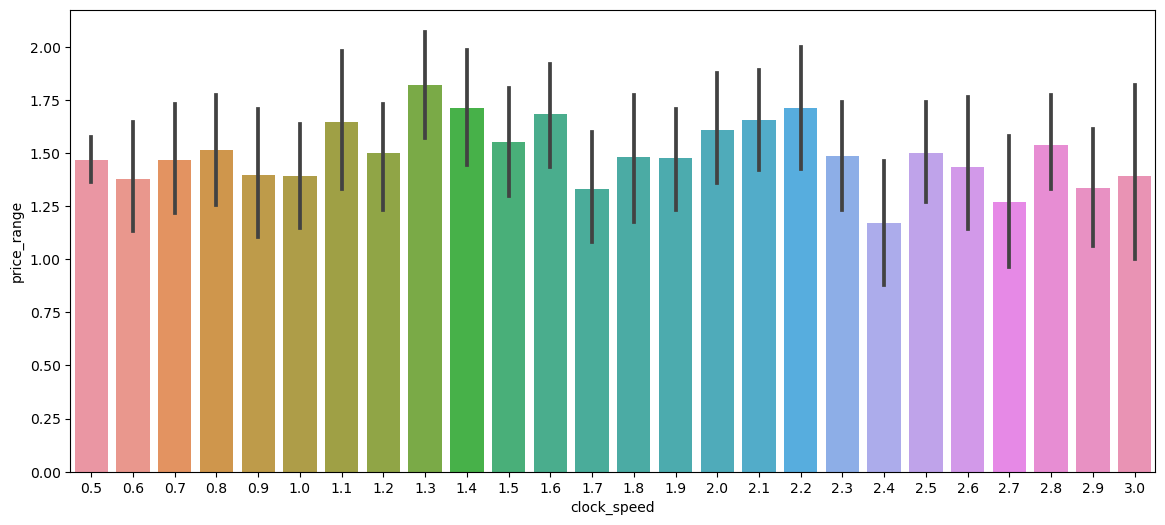

In [55]:
plt.figure(figsize=(14,6))
sns.barplot(data=data,x='clock_speed',y='price_range')

**Dual-sim**

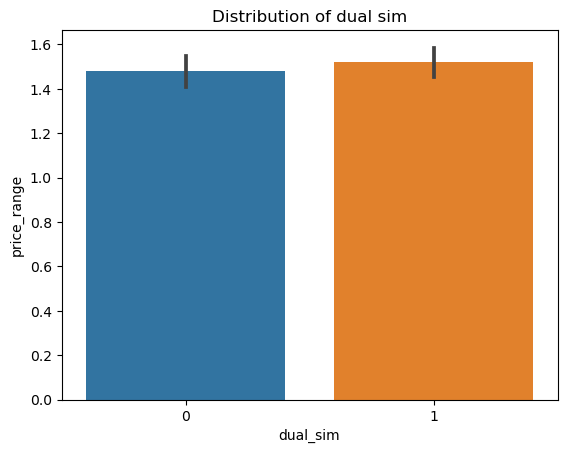

In [20]:
sns.barplot(x='dual_sim', y='price_range', data=data)
plt.title('Distribution of dual sim')
plt.show()

 **Insights**   
 *As we can see, up to pricing points that are low, medium, and high, everything is much the same.  
However, when we go up to extremely high price points, we see that the number of people using dual sim is rising.*


**Front Camera**

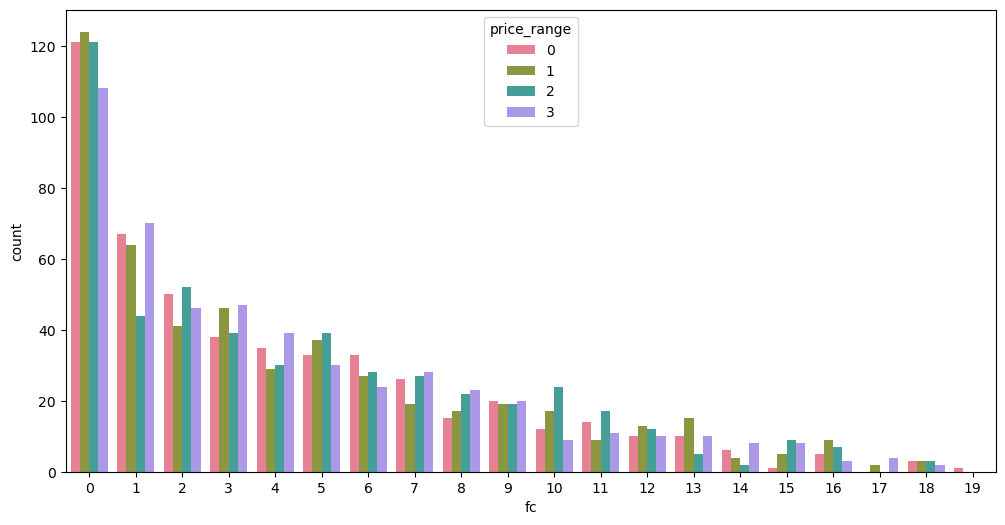

In [60]:
plt.figure(figsize=(12,6))
sns.countplot(data=data,x='fc',hue='price_range',palette='husl')
plt.show()

*The aforementioned figure shows that their count will drop when the value of fc increases from 0 to 19. This suggests that the quantity of phones reduces as front cameras get superior.*

<AxesSubplot:xlabel='price_range', ylabel='fc'>

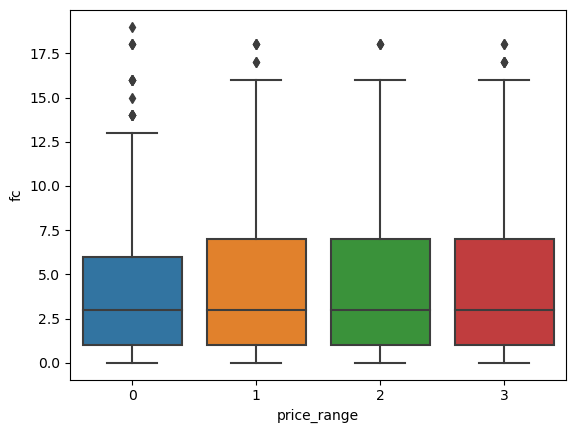

In [21]:
sns.boxplot(data=data,y='fc',x='price_range')

**Insights**  
*Given that front camera megapixel distribution is consistent across all price points, it's possible that this feature won't be a reliable indicator of price range.   
For example, if Bob just considered front camera megapixels when setting prices, this may result in negative growth if other companies offered more sophisticated features that consumers would find more valuable. Consequently, in order for businesses to be competitive in the market, it is critical that they take into account a variety of aspects and keep updated of changing consumer preferences and technology breakthroughs.*

**3G**

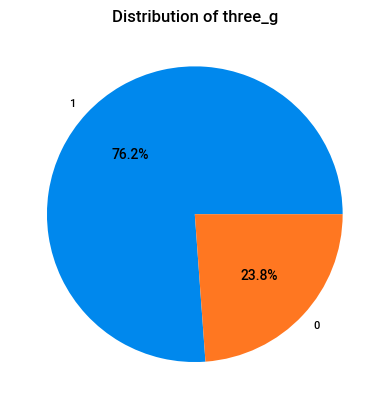

In [91]:
threeg_counts = data['three_g'].value_counts()
plt.pie(threeg_counts, labels=threeg_counts.index, autopct='%1.1f%%')
plt.title('Distribution of three_g')
plt.show()

**Insights**  
*Based on this analysis, we may see that the three_g sims are more prevalent overall in every price level(76.2% of the mobile supports 3G). For companies that produce or market mobile devices, this can have a beneficial effect. It suggests that despite the growing accessibility of 4G networks, customers still place a high value on mobile handsets having 3G connectivity.*

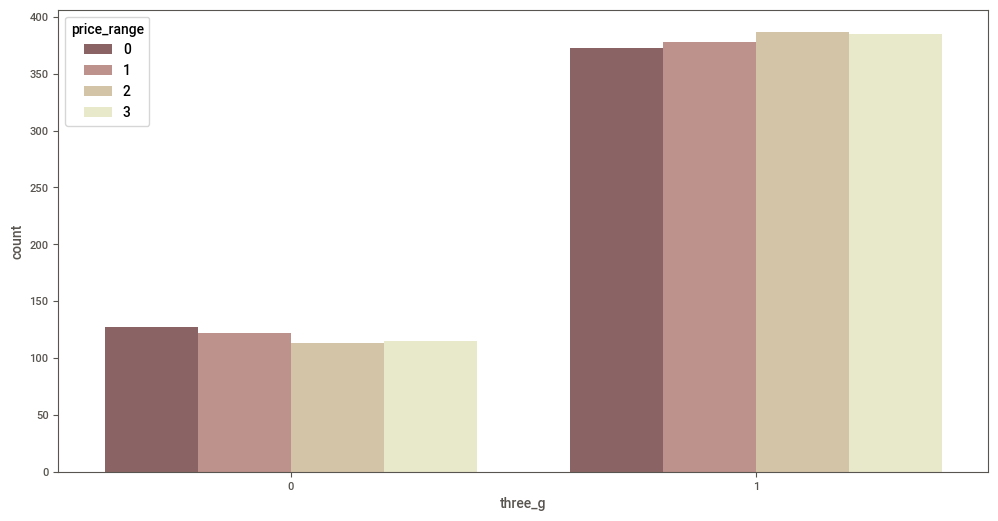

In [92]:
plt.figure(figsize=(12,6))
sns.countplot(data['three_g'],hue=data['price_range'],palette='pink')
plt.show()

*Most smartphones equipped with 3G features fall into the second pricing bracket. This may be the case because the price range for 3G mobile phones has narrowed in comparison to 4G mobiles, which are more widely available on the market.*

**4G**

<AxesSubplot:xlabel='four_g', ylabel='price_range'>

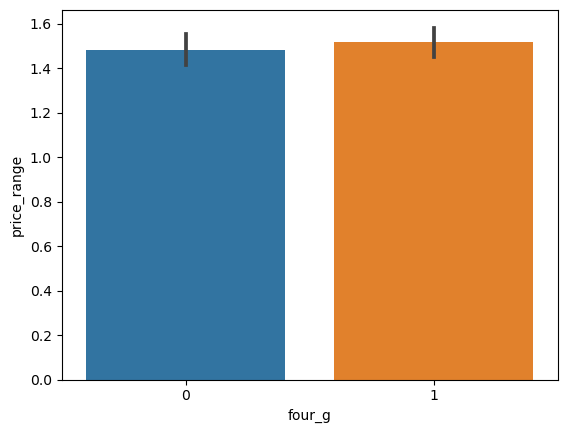

In [23]:
sns.barplot(data=data,x='four_g',y='price_range')

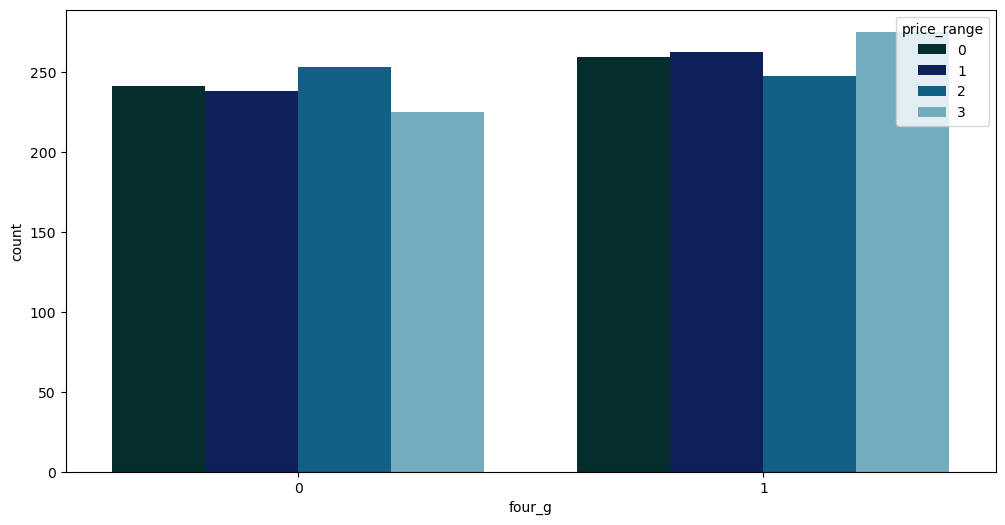

In [48]:
plt.figure(figsize=(12,6))
sns.countplot(data['four_g '],hue=data['price_range'],palette='ocean')
plt.show()

**Insight**
*The countplot depicting 4G-enabled mobile phones across price ranges reveals a consistent distribution of connectivity features across different segments of the market. The presence of 4G capability appears to be widespread across various price ranges, indicating its significance as a standard feature in mobile devices regardless of price. This suggests that consumers across different budget levels prioritize access to faster data speeds and enhanced connectivity, driving manufacturers to incorporate 4G technology into their product offerings to meet evolving consumer expectations. The uniform distribution of 4G-enabled phones underscores its importance as a fundamental feature in shaping consumer preferences and market dynamics within the mobile phone industry, influencing pricing strategies and product differentiation efforts across diverse market segments.*

**Pixel_height & Pixel_width**

<AxesSubplot:xlabel='px_height', ylabel='Density'>

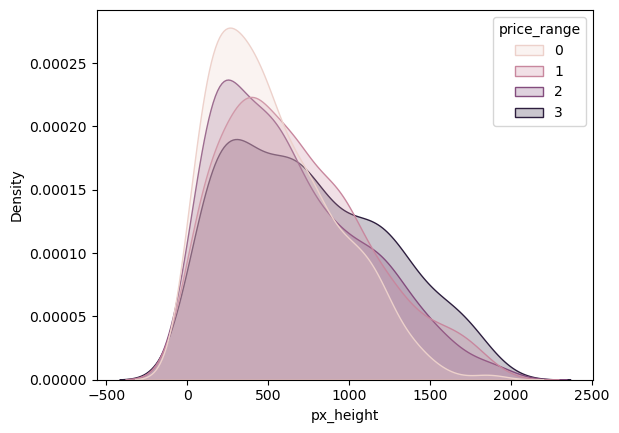

In [27]:
sns.kdeplot(data=data,x='px_height',hue='price_range',fill=True)

**Insights**  
*Pixel_height is almost similar as we move from low cost to very high cost and it shows small variation in this feature*

<AxesSubplot:xlabel='px_width', ylabel='Density'>

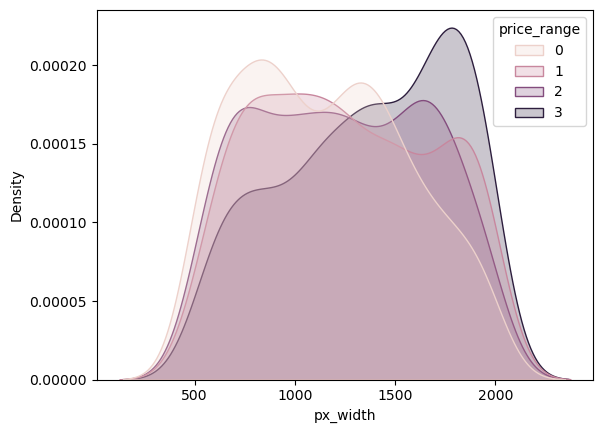

In [28]:
sns.kdeplot(data=data,x='px_width',hue='price_range',fill=True)

**Insights**  
*It is evident from the analysis of the pixel width distribution across price ranges that the pixel width does not continuously rise from low-cost to extremely high-cost mobile phones. Specifically, the nearly similar pixel width of high- and medium-cost mobile phones suggests that this may not be the only factor influencing the range of prices for mobile phones. The price range may also be significantly influenced by additional attributes like processing speed, camera quality, and storage capacity.*


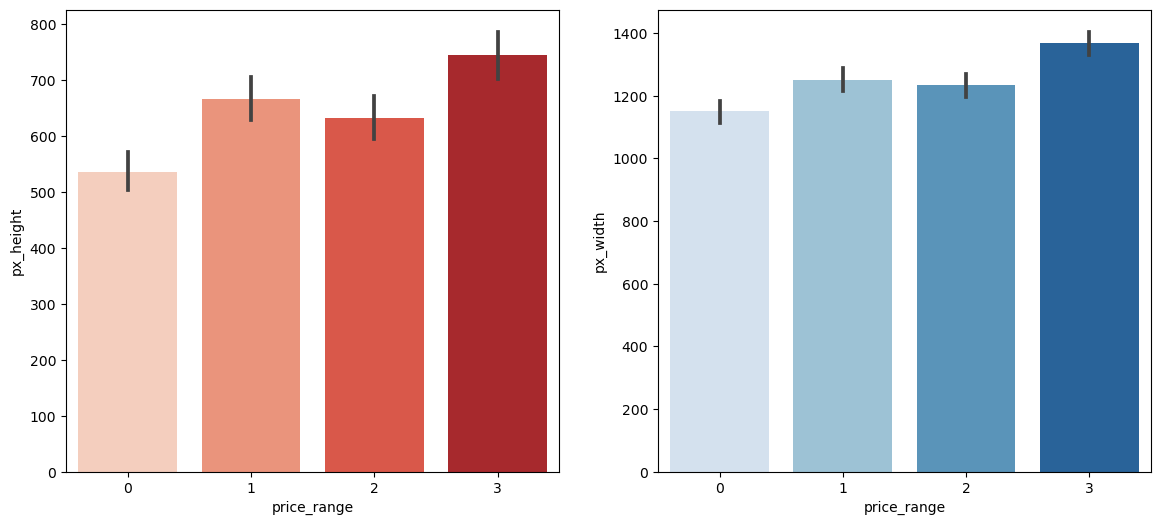

In [46]:
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
sns.barplot(data=data,x='price_range',y='px_height',palette='Reds')
plt.subplot(1,2,2)
sns.barplot(data=data,x='price_range',y='px_width',palette='Blues')
plt.show()

**RAM**

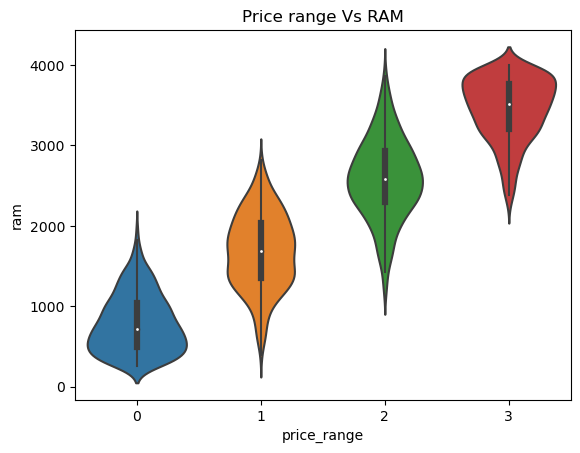

In [39]:
sns.violinplot(data=data,x='price_range',y='ram')
plt.title('Price range Vs RAM')
plt.show()

**Insights**  
*RAM size has high correlation with price range for mobile phones, so when RAM size increases, we can expect a mobile to cost more. For example, a phone with 8GB of RAM may cost more than a phone with 4GB of RAM. This is because RAM is one of the most important components of a mobile phone. It is the memory used to store applications and data, and a larger RAM allows the phone to run more smoothly and quickly. As a result, phones with more RAM tend to cost more. For consumers willing to pay more, Bob may utilise this information to create and sell cellphones with more RAM, which could result in more sales and profits*

**Primary Camera**

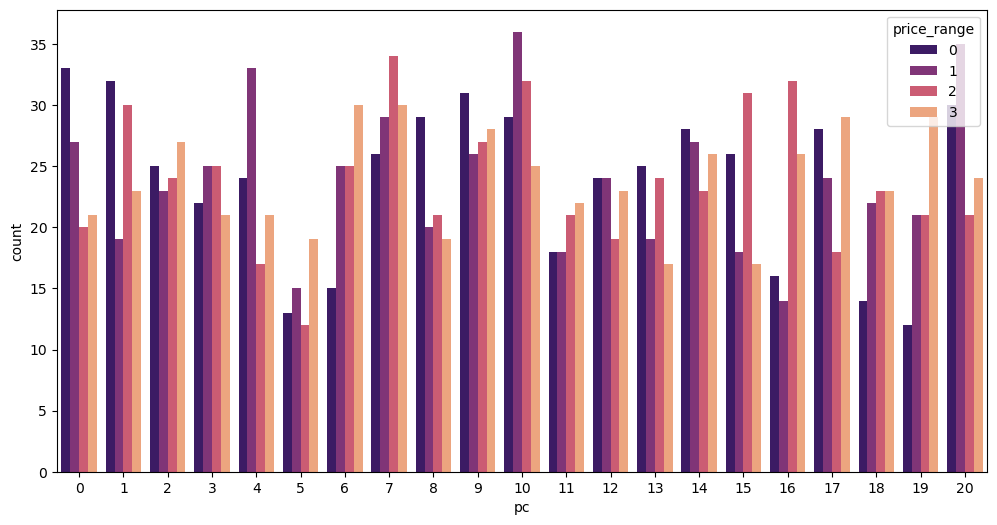

In [75]:
plt.figure(figsize=(12,6))
sns.countplot(data=data,x='pc',hue='price_range',palette='magma')
plt.show()

**Insights**  
*The dominance of mobile phones with primary camera (pc) values of 10 and 20 megapixels compared to those with a value of 5 megapixels suggests a prevalent consumer preference for devices offering higher resolution photography capabilities. This trend reflects broader market trends towards smartphones equipped with advanced photography features, driven by consumers prioritizing better camera quality in their purchasing decisions. The higher count of phones with 10 and 20-megapixel primary cameras underscores the perceived value of enhanced camera specifications. This observation highlights the importance of camera features in shaping consumer preferences and market dynamics within the mobile phone industry.* 

**Touch Screen**

<AxesSubplot:xlabel='touch_screen', ylabel='price_range'>

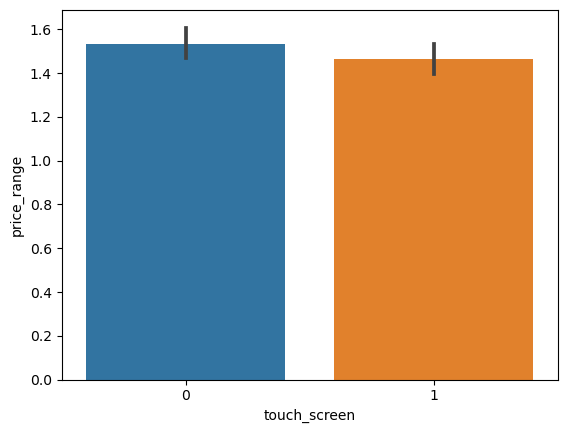

In [31]:
sns.barplot(data=data,x='touch_screen',y='price_range')

**Insights**  
*Despite the widespread preference for touchscreen mobile devices in the market, it's notable that phones without touchscreens exhibit a slightly higher price range in our dataset. This could be attributed to the presence of niche market segments or specialized use cases where consumers prioritize features other than touchscreen functionality.  
Additionally, factors such as premium materials, advanced hardware specifications, perceived quality, brand image, and historical pricing trends may influence consumer's willingness to pay a premium for mobile phones without touchscreens, highlighting the diverse range of preferences and market dynamics within the mobile phone industry. Further analysis is warranted to understand the underlying factors driving this pricing pattern and its implications for product positioning and market segmentation strategies.*

**Screen_height & Screen_width**

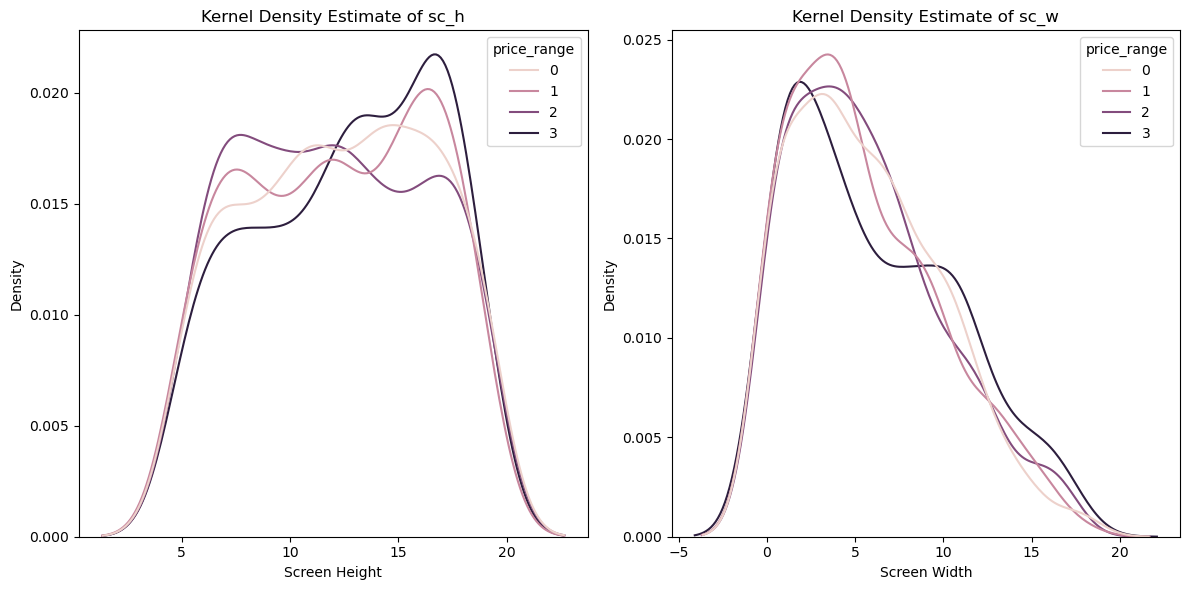

In [32]:
# Create a figure with two subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# KDE plot for 'sc_h' with hue='price_range'
sns.kdeplot(data=data, x='sc_h', hue='price_range', ax=axs[0])
axs[0].set_title('Kernel Density Estimate of sc_h')
axs[0].set_xlabel('Screen Height')
axs[0].set_ylabel('Density')

# KDE plot for 'sc_w' with hue='price_range'
sns.kdeplot(data=data, x='sc_w', hue='price_range', ax=axs[1])
axs[1].set_title('Kernel Density Estimate of sc_w')
axs[1].set_xlabel('Screen Width')
axs[1].set_ylabel('Density')

# Adjust layout and show the plots
plt.tight_layout()
plt.show()


**Insights**  
*The distribution of screen size across the price range in the plot above shows that there is not a significant variation in the distribution. Nonetheless, it is evident that the screen size's height maximum price ranges fall between 15 and 20 inches. On the other hand, when it comes to screen width, the medium priced price range has more sales in the 2 to 7 inch range.*



**Number of cores of processors**

<AxesSubplot:xlabel='n_cores', ylabel='price_range'>

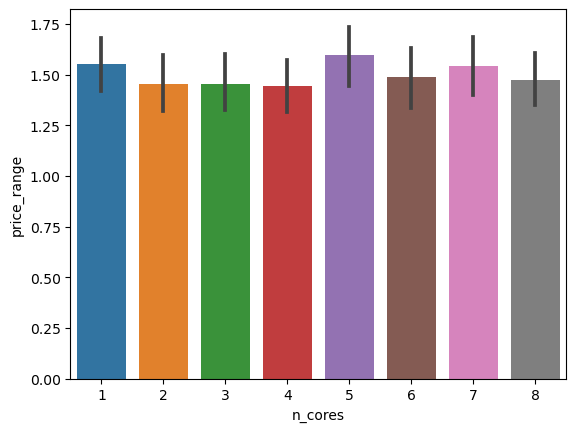

In [35]:
sns.barplot(data=data,x='n_cores',y='price_range')

*In this barplot we can observe that mobile phones with 5 cores have a higher frequency in higher price ranges compared to phones with 8 cores. This may be due to consumers may perceive that phones with 5 cores offer better performance or value for money compared to phones with 8 cores in the given price ranges. This perception could be influenced by factors such as the specific processors used, overall system optimization, and marketing strategies emphasizing performance benefits.  
The performance and efficiency of processor cores depend not only on their number but also on architectural design, clock speeds, and software optimization. Phones with 5 cores may offer comparable or superior performance to those with 8 cores due to better optimization or more advanced technology.*

**Internal Memory**

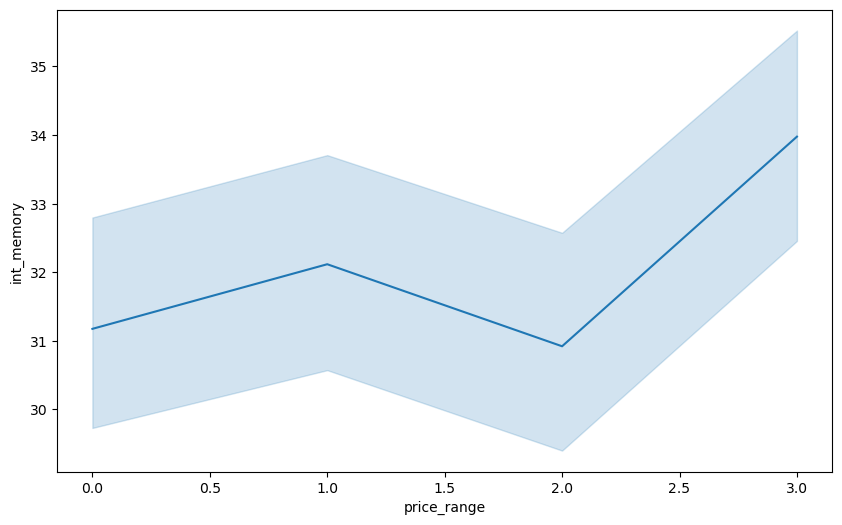

In [52]:
plt.figure(figsize=(10,6))
sns.lineplot(data=data,x='price_range',y='int_memory')
plt.show()

*As we move along the x-axis (representing different price ranges), we observe variations in the internal memory capacity of mobile phones. We can observe a trend where higher-priced phones offers larger internal memory capacities compared to lower-priced ones. This indicates that consumers are willing to pay more for additional internal memory storage.*

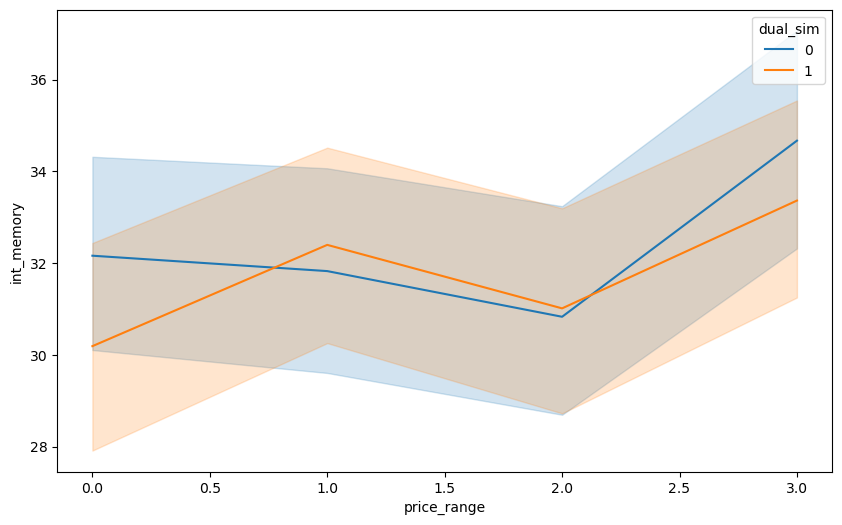

In [53]:
plt.figure(figsize=(10,6))
sns.lineplot(data=data,x='price_range',y='int_memory',hue='dual_sim')
plt.show()

*The lines representing phones with and without dual SIM capability shows variations in how internal memory capacity differs between them within each price range. For example, there is an instance where phones with dual SIM capability offer slightly lower internal memory compared to their single SIM counterparts within the same price range. This may be due to the additional hardware required for dual SIM functionality, leading to compromises in other features such as internal memory.* 

**Mobile depth**

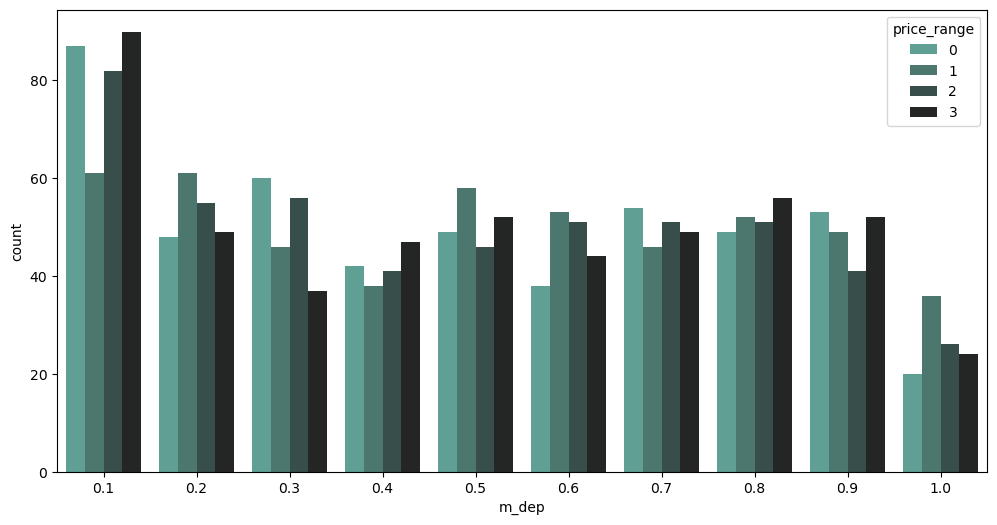

In [64]:
plt.figure(figsize=(12,6))
sns.countplot(data=data,x='m_dep',hue='price_range',palette='dark:#5A9_r')
plt.show()

**Insights**  
*The higher count of mobile phones with a m_dep (mobile depth) value of 0.1 suggests a prevalent consumer preference for slimmer and more compact smartphone designs. This trend reflects a broader market shift towards thinner devices, potentially driven by perceptions of premiumness, technological advancements allowing for sleeker designs without sacrificing performance, and intense competition among manufacturers to produce the most attractive devices. Overall, the dominance of phones with a m_dep of 0.1 underscores the importance of design aesthetics and consumer preferences in shaping the landscape of the mobile phone industry.*

**Wifi**

<AxesSubplot:xlabel='price_range', ylabel='wifi'>

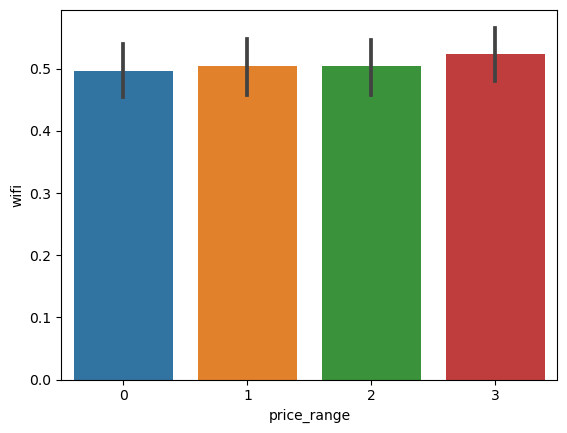

In [87]:
sns.barplot(data=data,y='wifi',x='price_range')

**Insights**  
*From this we can observe that higher price ranges of mobile phones have higher prevalence of Wi-Fi capability underscores the significance of connectivity features in premium devices. Consumers investing in higher-priced phones expect comprehensive connectivity options, including Wi-Fi, to support their diverse digital needs. Wi-Fi availability in premium phones enhances user experience by facilitating seamless internet access for browsing, streaming, and other online activities.  
Bob can prioritize incorporating advanced connectivity features in higher-priced phones to meet the expectations of discerning consumers seeking cutting-edge technology and superior functionality.*

**Weight of Mobile phone**

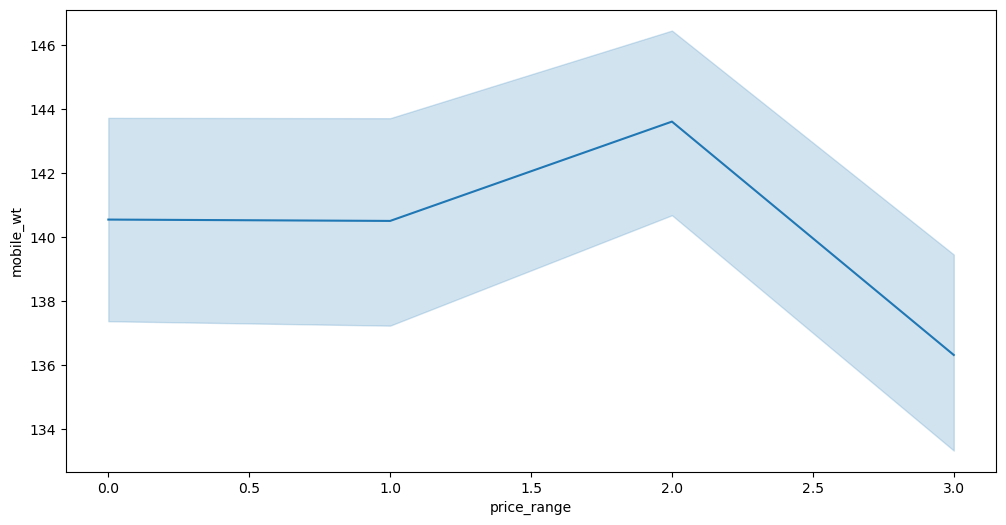

In [89]:
plt.figure(figsize=(12,6))
sns.lineplot(data=data,x='price_range',y='mobile_wt',palette='dark:#5A9_r')
plt.show()

**Insights**  
*The line plot reveals that lower weighted mobile phones are associated with higher price ranges, indicating a consumer preference for lightweight,  sleek design aesthetics and portable designs in premium smartphones. This preference reflects the premiumization of design and materials, with manufacturers prioritizing lightweight construction techniques and advanced materials to enhance the perceived value and sophistication of high-end devices. Technological advancements and material innovation enable the production of lightweight yet durable smartphones without compromising on performance*

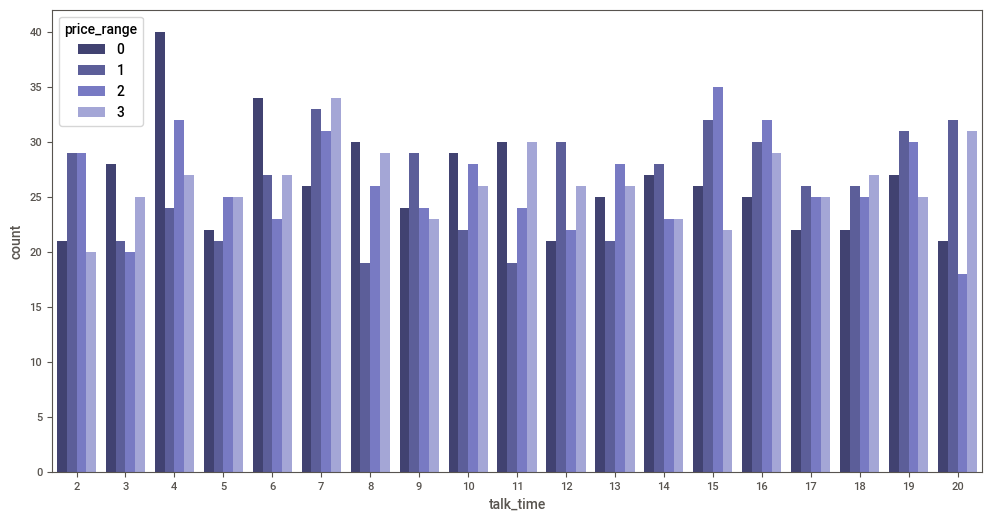

In [97]:
plt.figure(figsize=(12,6))
sns.countplot(data=data,x='talk_time',hue='price_range',palette='tab20b')
plt.show()

**Insights**  
*The observation that mobile phones with a talk time of 4 hours and a low-cost price range have the highest count suggests a strong consumer preference for extended battery life in budget-oriented devices. This indicates that practical considerations, such as battery performance for talk time, play a crucial role in purchasing decisions among cost-conscious consumers. Manufacturers targeting this segment strategically prioritize offering affordable solutions with longer talk time to meet the practical communication needs of budget-oriented users.*